In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('dataset.csv')

In [5]:
df.head()

,NIR Reading,Red Reading,Glucose Level
0,111694,94999,101
1,106800,92002,97
2,112008,93764,121
3,108500,91900,97
4,104551,91013,97


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   NIR Reading    20 non-null     int64
 1   Red Reading    20 non-null     int64
 2   Glucose Level  20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


In [7]:
df.describe()

,NIR Reading,Red Reading,Glucose Level
count,20.000000,20.000000,20.000
mean,109397.900000,90612.850000,104.500
std,3676.419266,7444.077733,15.514
min,103347.000000,69700.000000,86.000
25%,106435.250000,90966.000000,97.000
50%,108821.000000,92586.500000,100.000
75%,112105.250000,94042.000000,108.250
max,116234.000000,97104.000000,143.000


In [8]:
df.columns

Index(['NIR Reading', 'Red Reading', 'Glucose Level'], dtype='object')

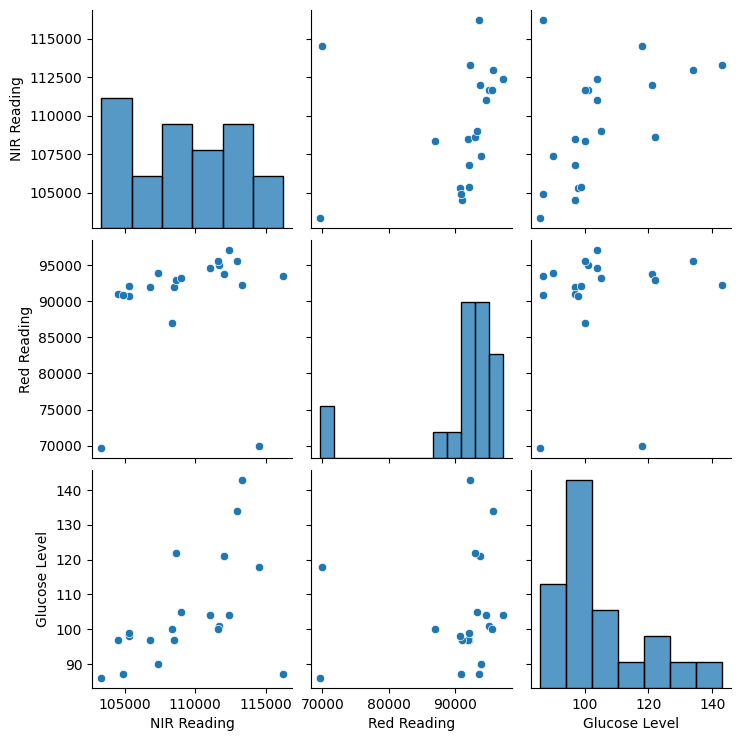

In [9]:
sns.pairplot(df)

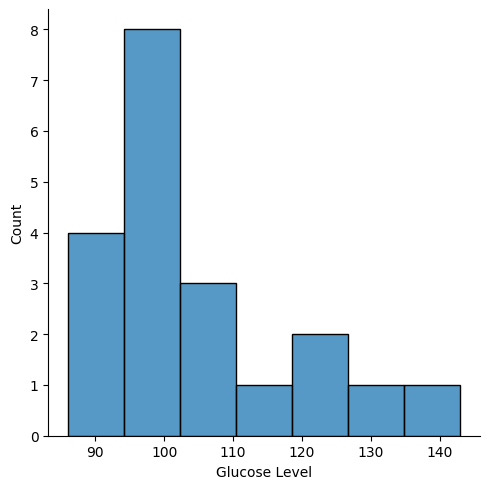

In [10]:
sns.displot(df['Glucose Level'])

<Axes: >

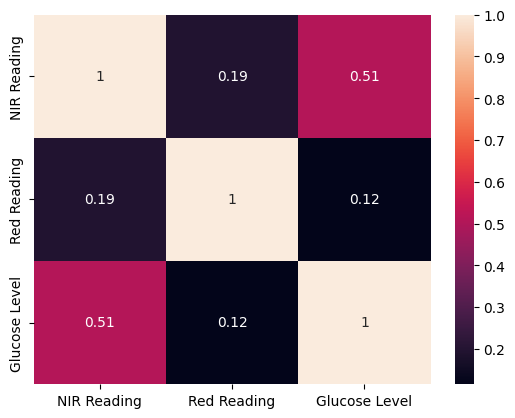

In [15]:
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True)

In [16]:
X=df[['NIR Reading','Red Reading']]

In [17]:
Y = df['Glucose Level']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4, random_state = 101)


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train, Y_train)

LinearRegression()

In [23]:
print(lm.intercept_)

-76.465709552304


In [24]:
lm.coef_

array([ 1.64955159e-03, -3.28468210e-06])

In [25]:
X_train.columns

Index(['NIR Reading', 'Red Reading'], dtype='object')

In [26]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

,Coeff
NIR Reading,0.001650
Red Reading,-0.000003


In [27]:
predictions = lm.predict(X_test)

In [28]:
predictions

array([102.20877613, 100.3086792 , 107.98928047,  99.40420338,
       109.56523218, 103.02925556,  96.99738935, 107.37991136])

In [29]:
Y_test

3      97
7      90
2     121
1      97
10    134
16    105
14     99
18    100
Name: Glucose Level, dtype: int64

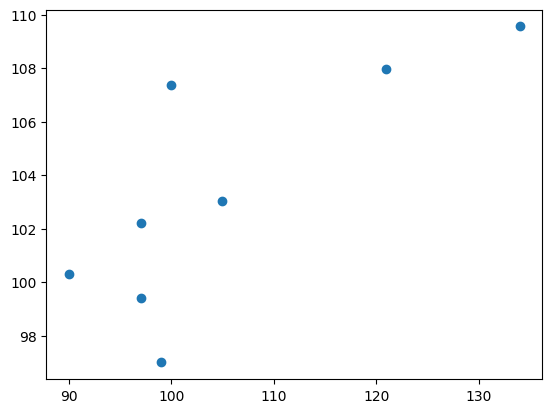

In [30]:
plt.scatter(Y_test,predictions)